In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
from shutil import rmtree
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import json
import re
from datetime import datetime

In [25]:
### path of the log
## test1 one node local provider with default parameters(1 threads in sampling, psi4 calculator 1 threads)
cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006cpu_usage_20230916_142520.log') ## cpu log test
gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006gpu_usage_20230916_142520.log') ## gpu log test
mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006mem_usage_20230916_142520.log') ## mem log test

## test2 one node local provider with 4threads in sampling
cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002cpu_usage_20230918_192848.log')
gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002gpu_usage_20230918_192848.log')
mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002mem_usage_20230918_192848.log')



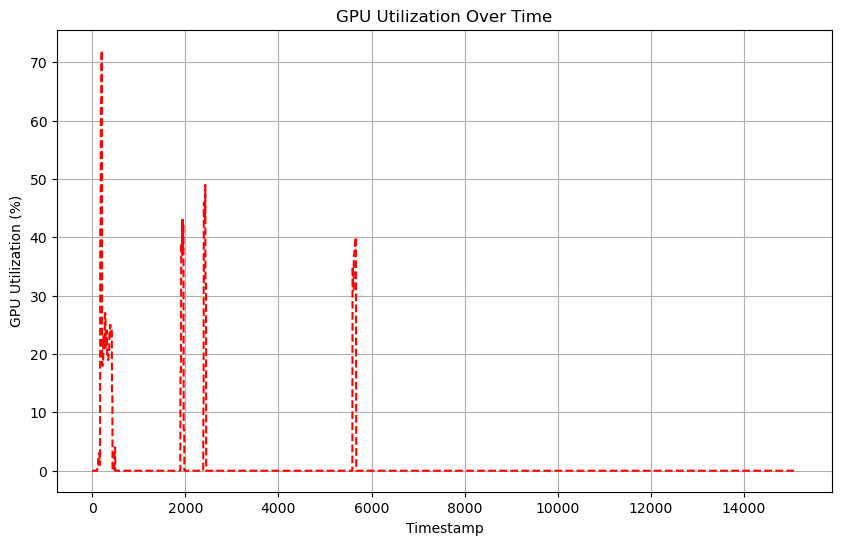

In [26]:
## process gpu util
df = pd.read_csv(gpu_log)

# 将 Timestamp 列转换为日期时间类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# timestamp = df['Timestamp']

# 绘制 GPU 利用率折线图
plt.figure(figsize=(10, 6))
# timestamp not accurate， some data share the same timestamp
# gpu_utilization = df.groupby('Timestamp')['GPU Utilization (%)']
# timestamp = gpu_utilization.groups.keys()
# gpu_utilization_mean = gpu_utilization.mean()
# rows = gpu_utilization.head(60*10*4)
gpu_utilization_group = df.groupby('GPUs')['GPU Utilization (%)']
gpu = [ gpu_utilization_group.get_group(i) for i in range(0, len(gpu_utilization_group.groups.keys()))]


# rows_plot = [rows[i] for i in range(0, len(rows), 4)]
plt.plot(gpu[0], label='GPU 0', color='red', linestyle='--')
# plt.plot(gpu_utilization_mean, label='GPU Mean', color='blue', linestyle='--')
# gpu_utilization.plot()
plt.xlabel('Timestamp')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Utilization Over Time')
plt.grid(True)

In [9]:
print(len(df.groupby('Timestamp')['GPU Utilization (%)']))
print(gpu_utilization_group.groups.keys())


11189
dict_keys([0, 1, 2, 3])


In [27]:
## process cpu util

# header_pattern = r'^\s*CPU\s+%\w+'
header_pattern = r'\((\d+) CPU\)'
data_pattern = r'^\d{2}:\d{2}:\d{2} [AP]M\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)'
# data_pattern = r'^\d{2}:\d{2}:\d{2}\s+(?:AM|PM)'

## cpu format

cnt = 10
cpu_utilization = []
with open (cpu_log, 'r') as file:
    is_header = True
    for line in file:
        line = line.strip()
        
        if is_header:
            match = re.search(header_pattern, line)
            if match:
                num_cpu = int(match.group(0)[1:3])
                print(num_cpu)
                is_header = False
        
        match = re.match(data_pattern,line)
        if match:
            cpu_stats = [float(match.group(i)) for i in range(1,12)]
            time_stamp = match.group(0)[0:8]
            am_pm = match.group(0)[9:11]
            am_pm = "pm"
            time_obj = datetime.strptime(time_stamp + am_pm, "%I:%M:%S%p")
            time_24h_str = time_obj.strftime("%H:%M:%S")
            cpu_utilization.append(cpu_stats)
            if(cnt>0):
                print(line)
                print(time_stamp+am_pm)
                print(time_24h_str)
                print(cpu_stats)
                cnt = cnt-1
        
        

56
07:28:48 PM    0   13.13    0.00    5.48    0.02    0.08    0.32    0.00    0.00    0.00   80.98
07:28:48pm
19:28:48
[0.0, 13.13, 0.0, 5.48, 0.02, 0.08, 0.32, 0.0, 0.0, 0.0, 80.98]
07:28:48 PM    1   13.12    0.00    5.70    0.01    0.08    0.10    0.00    0.00    0.00   80.99
07:28:48pm
19:28:48
[1.0, 13.12, 0.0, 5.7, 0.01, 0.08, 0.1, 0.0, 0.0, 0.0, 80.99]
07:28:48 PM    2   13.36    0.00    5.86    0.01    0.08    0.03    0.00    0.00    0.00   80.66
07:28:48pm
19:28:48
[2.0, 13.36, 0.0, 5.86, 0.01, 0.08, 0.03, 0.0, 0.0, 0.0, 80.66]
07:28:48 PM    3   13.44    0.00    5.83    0.02    0.08    0.01    0.00    0.00    0.00   80.63
07:28:48pm
19:28:48
[3.0, 13.44, 0.0, 5.83, 0.02, 0.08, 0.01, 0.0, 0.0, 0.0, 80.63]
07:28:48 PM    4   13.67    0.00    5.73    0.01    0.08    0.00    0.00    0.00    0.00   80.50
07:28:48pm
19:28:48
[4.0, 13.67, 0.0, 5.73, 0.01, 0.08, 0.0, 0.0, 0.0, 0.0, 80.5]
07:28:48 PM    5   13.43    0.00    5.59    0.01    0.08    0.00    0.00    0.00    0.00   80.88

In [28]:
## cpu util
def get_cpu_util(path:Path,pattern:list[str]) -> list:
    
    with open (path, 'r') as file:
        ## only get one header
        time = []
        is_header = True
        for line in file:
            line = line.strip()
            
            if is_header:
                match = re.search(pattern[0], line)
                if match:
                    num_cpu = int(match.group(0)[1:3])
                    print("number of cpus:")
                    print(num_cpu)
                    cpu_utilization = [[] for i in range (0,num_cpu+1)]
                    is_header = False
            
            match = re.match(pattern[1],line)
            if match:
                cpu_stats = [match.group(i) for i in range(1,12)]
                # get time stamp
                time_stamp = match.group(0)[0:8]
                am_pm = match.group(0)[9:11]
                # convert it to 24-hour
                time_obj = datetime.strptime(time_stamp + am_pm, "%I:%M:%S%p")
                time_24h_str = time_obj.strftime("%H:%M:%S")
                # cpu_utilization[i].append([time_24h_str] + cpu_stats)
                if (cpu_stats[0] == 'all'):
                    cpu_utilization[num_cpu].append([round(float(i)) for i in cpu_stats[1:]])
                else:
                    cpu_utilization[int(cpu_stats[0])].append([round(float(i)) for i in cpu_stats[1:]])
                if(cpu_stats[0]=='0'):
                    time.append(time_24h_str)
                
    return time,cpu_utilization

def plt_cpu_util(time_stamp:list,cpu_util:list,title:str):
    # plt.figure(figsize=(100,100))
    plt.plot(time_stamp,cpu_util)
    
    # 添加标题和坐标轴标签
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Utilization (%)')
    # 显示图形
    plt.show()

In [29]:
header_pattern = r'\((\d+) CPU\)'
data_pattern = r'^\d{2}:\d{2}:\d{2} [AP]M\s+(\w+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)'
pattern = [header_pattern,data_pattern]

time_stamp,cpu_utilization = get_cpu_util(cpu_log,pattern)
# print(len(cpu_utilization))
# print(type(pattern))
# print(type(pattern[0]))
cpu0_util = [round(100 - cpu_utilization[0][i][-1]) for i in range(0,len(cpu_utilization[0]))]

## just use 10 mins data
cpu0_util = cpu0_util[0:10*60]

sorted = np.sort(cpu0_util)
cdf = np.arange(1,len(sorted)+1)/len(sorted)



# # 绘制折线图
# plt.figure(figsize=(100,100))
# plt.plot(time_stamp, cpu0_util)

# # 添加标题和坐标轴标签
# plt.title('CPU Utilization')
# plt.xlabel('Time')
# plt.ylabel('Utilization (%)')

# # 显示图形
# plt.show()


number of cpus:
56


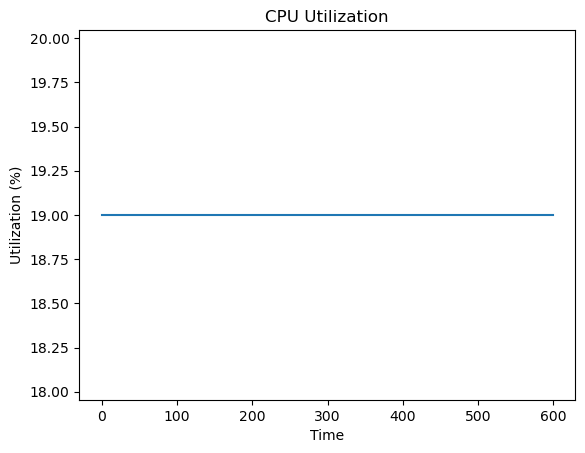

In [30]:
plt_cpu_util([i for i in range(0,len(cpu0_util))],cpu0_util,'CPU Utilization')

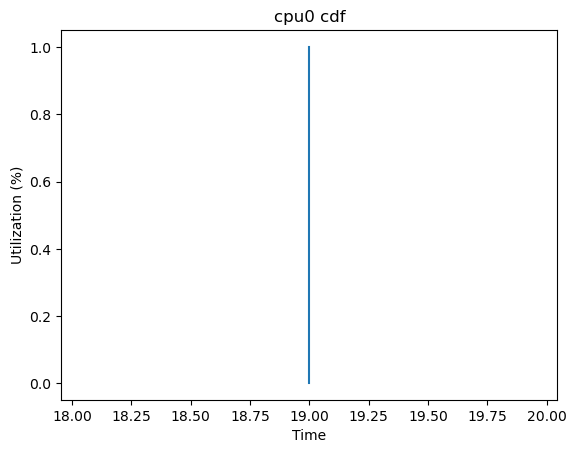

In [31]:
plt_cpu_util(sorted,cdf,"cpu0 cdf")


In [ ]:
## plt mem util